# Import the necessay libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

import pickle

# Import raw data

In [3]:
dataset = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls", index_col="EmpNumber")
dataset.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# Data description

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

The are 26 columns in our dataset, including the peformance rating. Eight of them are categorical variable, when 18 are numerical, including the performance rating. There are no missing value.
Now, let's take a look at the characteristics of each feature.

In [5]:
# Numerical features
dataset.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


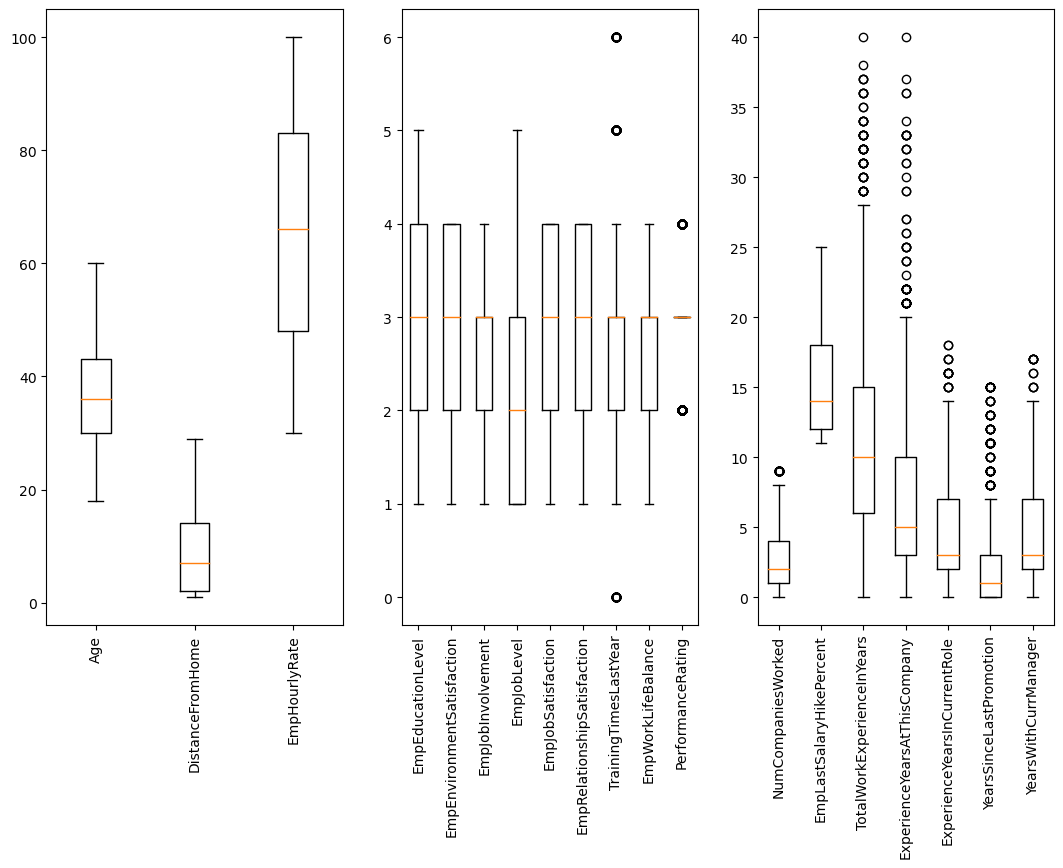

In [6]:
numeric1 = ['Age','DistanceFromHome', 'EmpHourlyRate']
numeric2 = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
            'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'PerformanceRating']
numeric3 = ['NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

plt.figure(figsize=(13,8))
plt.subplot(1, 3, 1)
plt.boxplot(dataset[numeric1], labels=dataset[numeric1].columns)
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
plt.boxplot(dataset[numeric2], labels=dataset[numeric2].columns)
plt.xticks(rotation=90);

plt.subplot(1, 3, 3)
plt.boxplot(dataset[numeric3], labels=dataset[numeric3].columns)
plt.xticks(rotation=90);

All of the features are skewed (For some on the left and for others on the right), since their means are different from their medians.

In [7]:
dataset.describe(include="object")

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


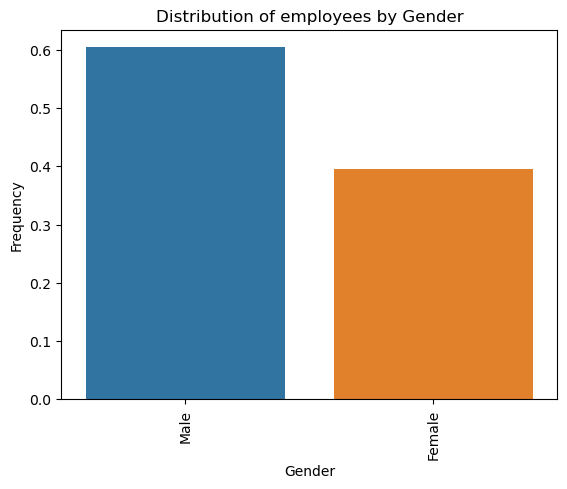

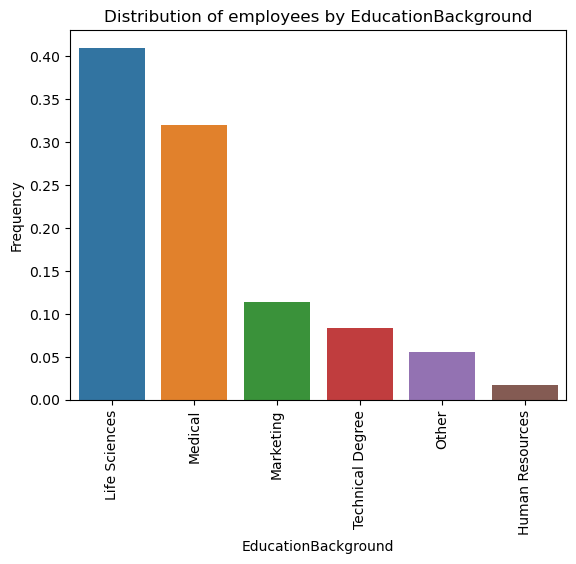

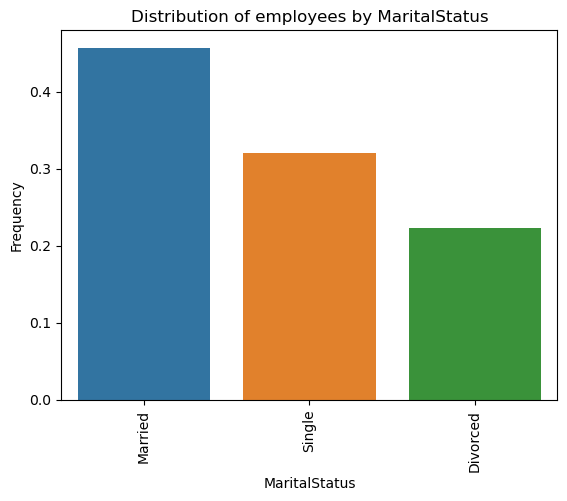

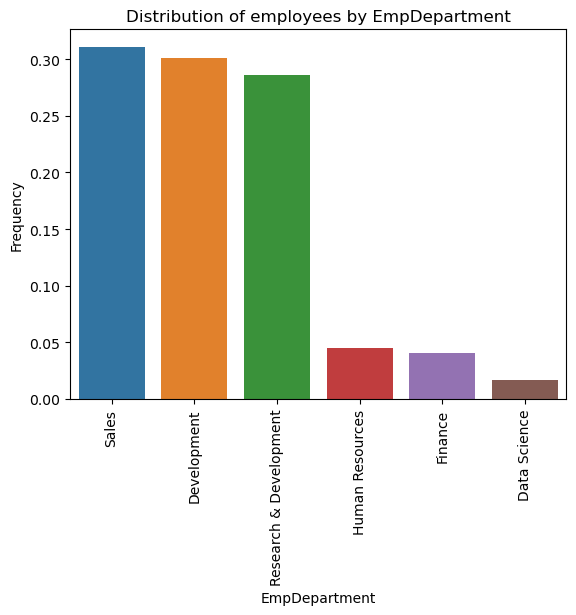

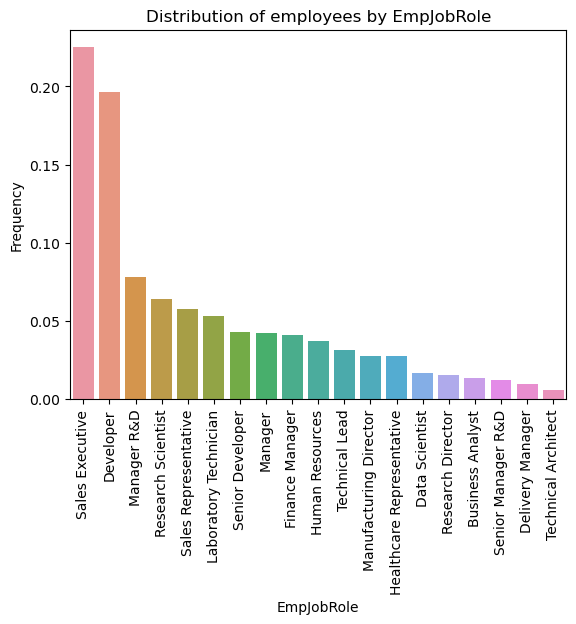

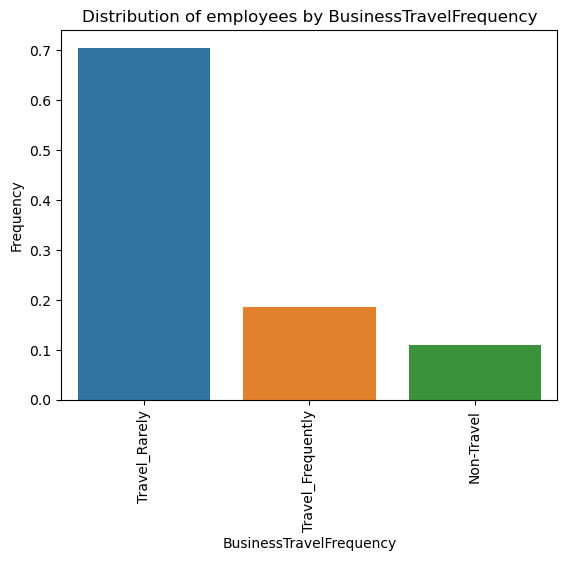

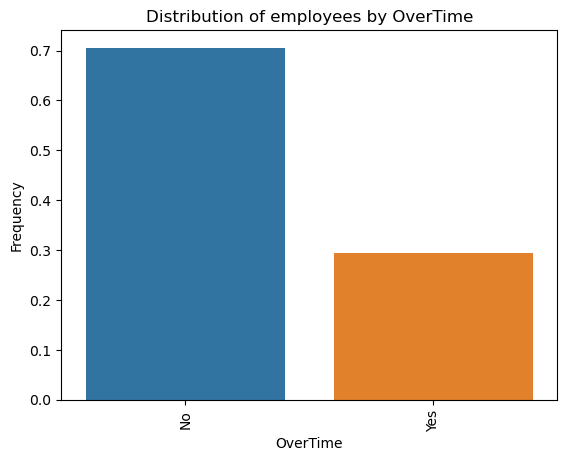

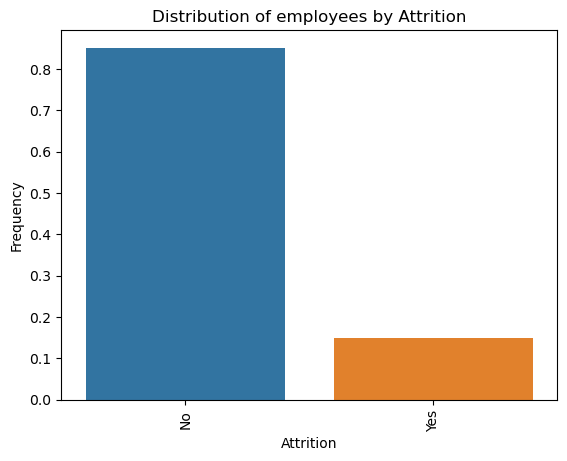

In [8]:
categorical = [col for col in dataset.columns if dataset[col].dtype=="O"]


for cat in categorical:
    df_plot = (dataset[cat]
         .value_counts(normalize=True)
         .rename("frequency")
         .to_frame()
         .reset_index())
    sns.barplot(
    x="index",
    y="frequency",
    data=df_plot)
    plt.xticks(rotation=90)
    plt.xlabel(cat)
    plt.ylabel("Frequency")
    plt.title("Distribution of employees by "+cat)
    plt.show();

The gender can take two values: male or female, whereas the education background takes 6 values, the maital status takes 3 values, the job role takes up to 19 values, the business travel fequency 3, the overtime and the attrition take 2 values each.

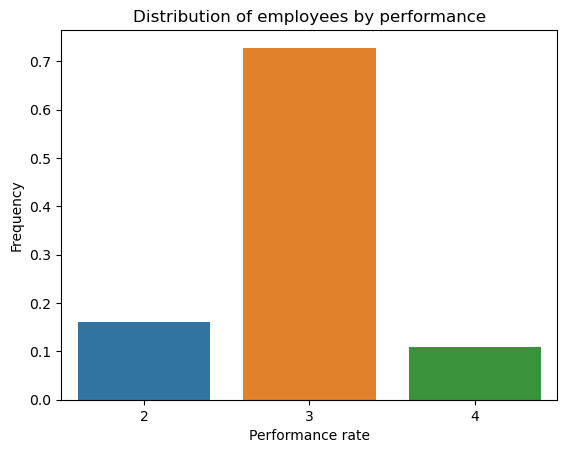

In [9]:
df_plot = (dataset["PerformanceRating"].astype(str)
         .value_counts(normalize=True)
         .rename("frequency")
         .to_frame()
         .reset_index())
sns.barplot(
x="index",
y="frequency",
order=["2","3","4"],
data=df_plot)
plt.xlabel("Performance rate")
plt.ylabel("Frequency")
plt.title("Distribution of employees by performance");

## Plot the mean performance rate per category of each categorical feature

### Gender

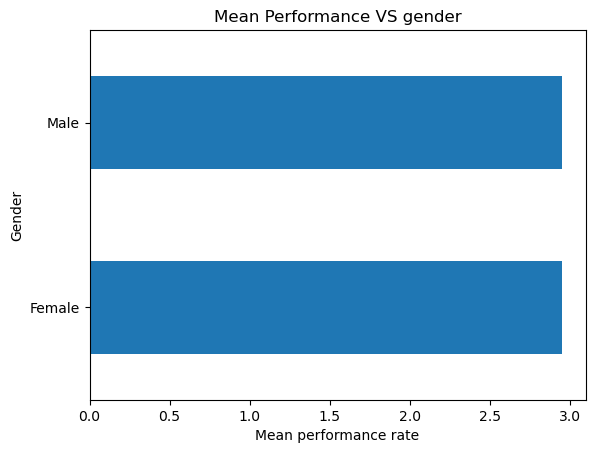

In [10]:
dataset["PerformanceRating"].groupby(dataset["Gender"]).mean().plot(kind="barh")
plt.xlabel("Mean performance rate")
plt.ylabel("Gender")
plt.title("Mean Performance VS gender");

The plot above shows no significatant diffeence between males and females. The plot below shows that the percentage of in each performance rate is nearly the same between males and females.

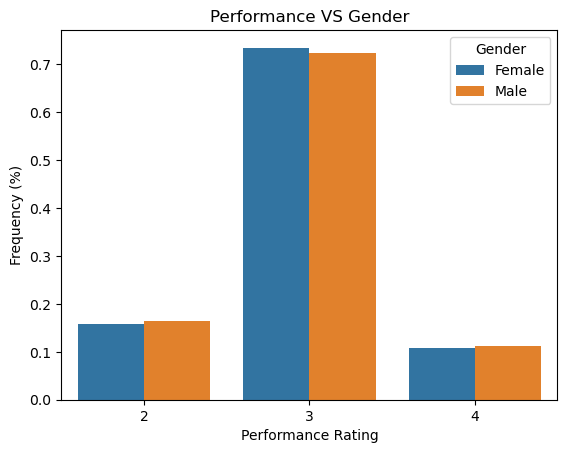

In [11]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["Gender"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="Gender",
    data=df_plot
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Gender");

### Education Background

The two plots indicate that employees whose background education is marketing seem to be rated lowe than the others and the employees in the category "Others" are more likely to be rated higher than the others 

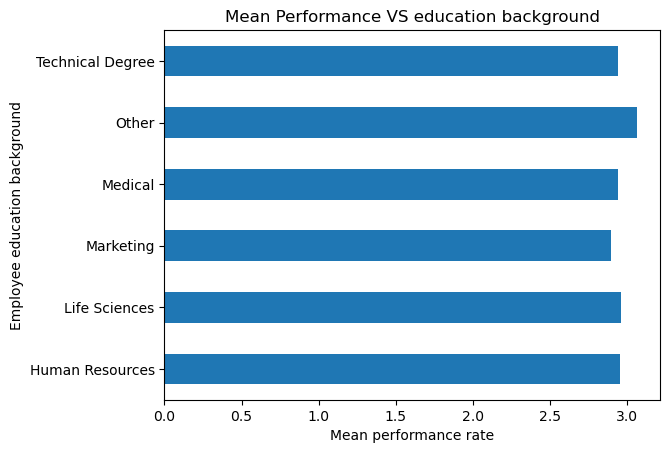

In [12]:
dataset["PerformanceRating"].groupby(dataset["EducationBackground"]).mean().plot(kind="barh")
plt.xlabel("Mean performance rate")
plt.ylabel("Employee education background")
plt.title("Mean Performance VS education background");

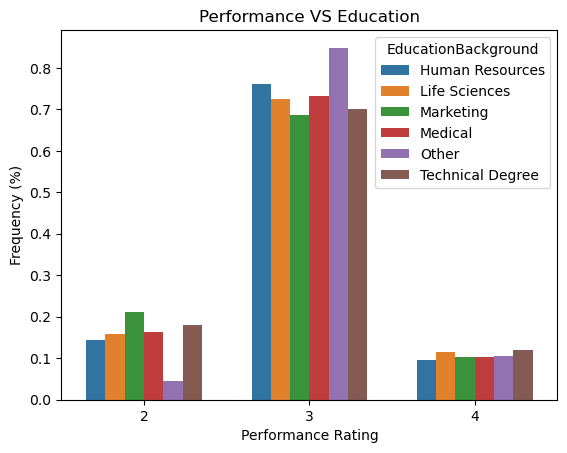

In [13]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EducationBackground"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="EducationBackground",
    data=df_plot,
    width=0.7
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Education");

### MaritalStatus

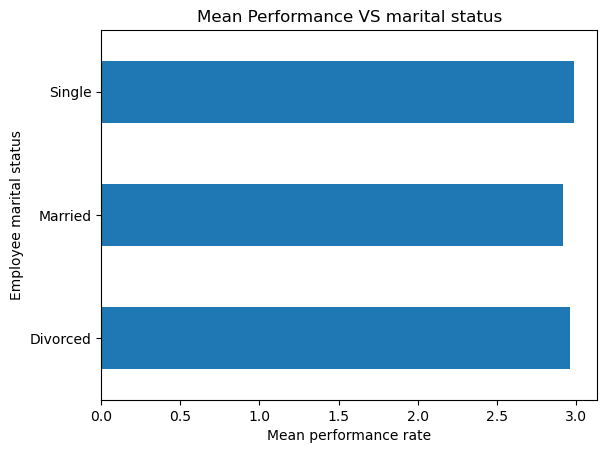

In [14]:
dataset["PerformanceRating"].groupby(dataset["MaritalStatus"]).mean().plot(kind="barh")
plt.xlabel("Mean performance rate")
plt.ylabel("Employee marital status")
plt.title("Mean Performance VS marital status");

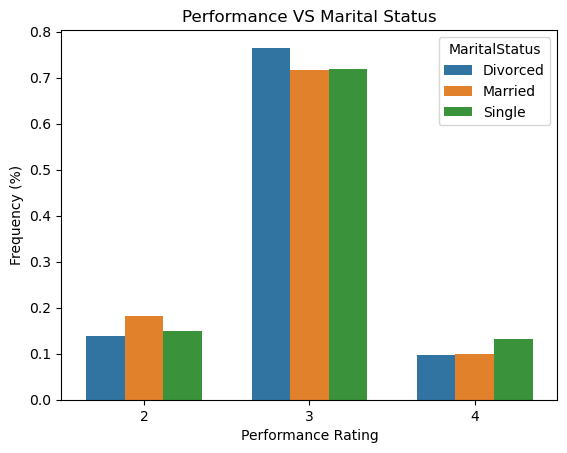

In [15]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["MaritalStatus"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="MaritalStatus",
    data=df_plot,
    width=0.7
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Marital Status");

### Department

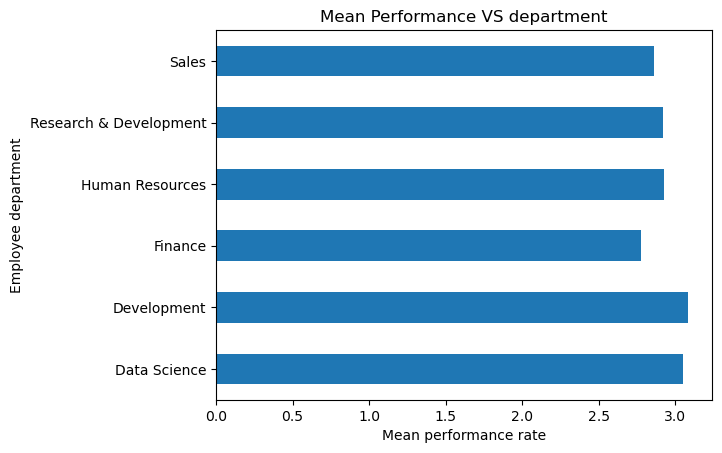

In [16]:
dataset["PerformanceRating"].groupby(dataset["EmpDepartment"]).mean().plot(kind="barh")
plt.xlabel("Mean performance rate")
plt.ylabel("Employee department")
plt.title("Mean Performance VS department");

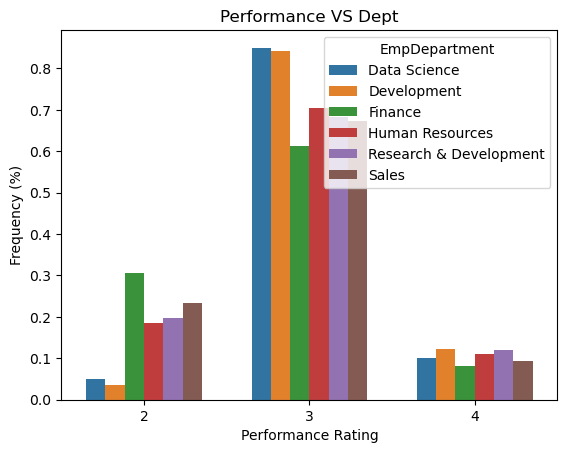

In [17]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EmpDepartment"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="EmpDepartment",
    data=df_plot,
    width=0.7
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Dept");

### Business Travel Frequency

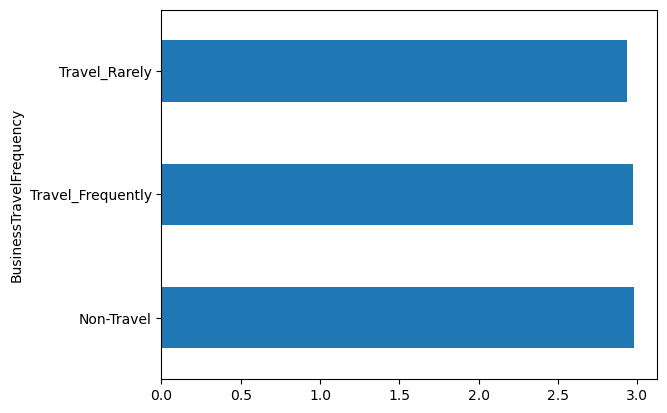

In [18]:
dataset["PerformanceRating"].groupby(dataset["BusinessTravelFrequency"]).mean().plot(kind="barh");

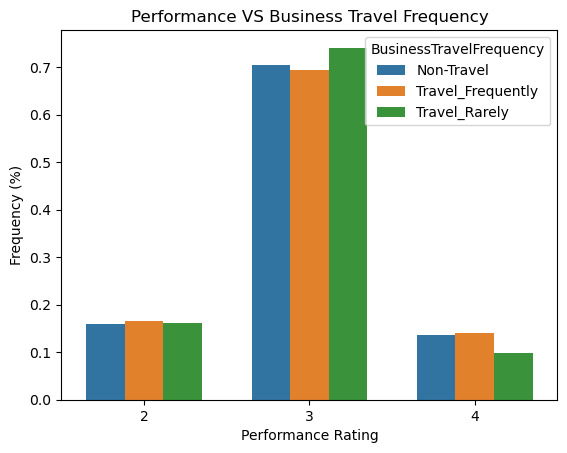

In [19]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["BusinessTravelFrequency"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="BusinessTravelFrequency",
    data=df_plot,
    width=0.7
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Business Travel Frequency");

### OverTime

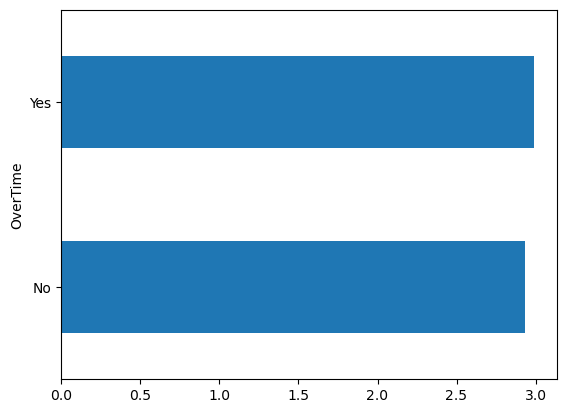

In [20]:
dataset["PerformanceRating"].groupby(dataset["OverTime"]).mean().plot(kind="barh");

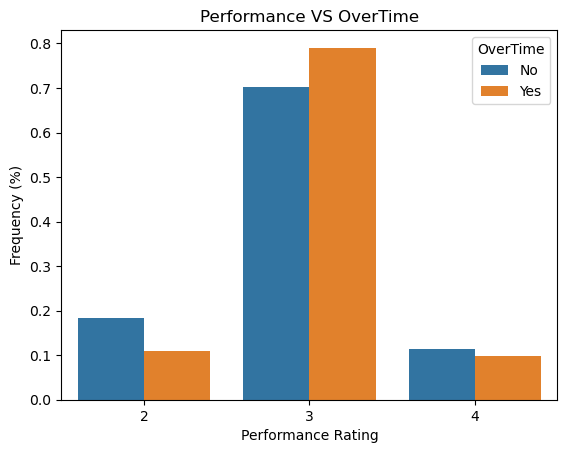

In [21]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["OverTime"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="OverTime",
    data=df_plot
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS OverTime");

### Attrition

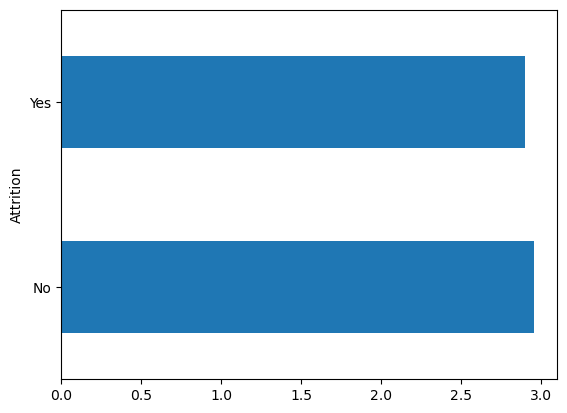

In [22]:
dataset["PerformanceRating"].groupby(dataset["Attrition"]).mean().plot(kind="barh");

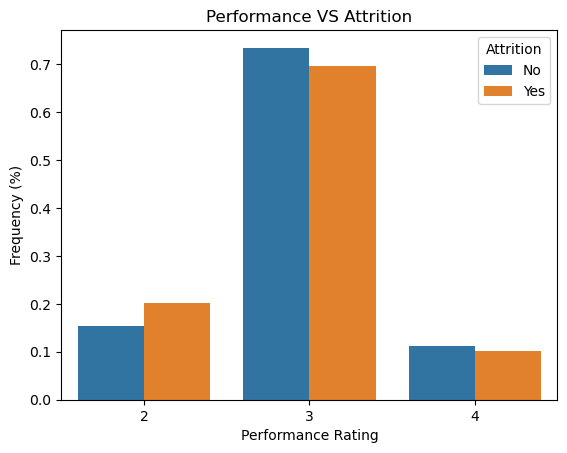

In [23]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["Attrition"])
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="Attrition",
    data=df_plot
)
plt.xlabel("Performance Rating")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Attrition");

## Plot the correlation matrix

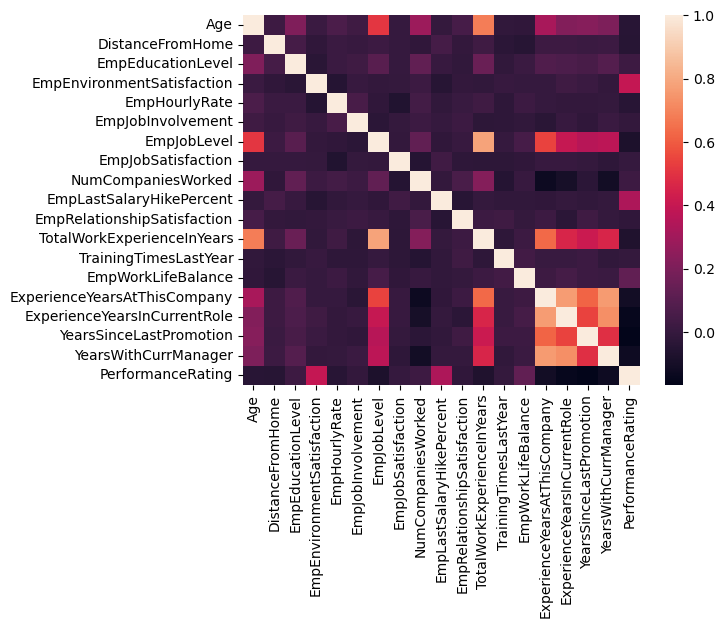

In [24]:
numeric = [col for col in dataset.columns if dataset[col].dtype!="O"]
corr = dataset[numeric].corr()
sns.heatmap(corr);

There are three features more correlated to the performance rating than the others, namely EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent and EmpLastSalaryHikePercent. Further more, there is not a correlation among these three variable.  Let's explore more the relationship between these three variables and the peformance rating.

### Employee Environment Satisfaction

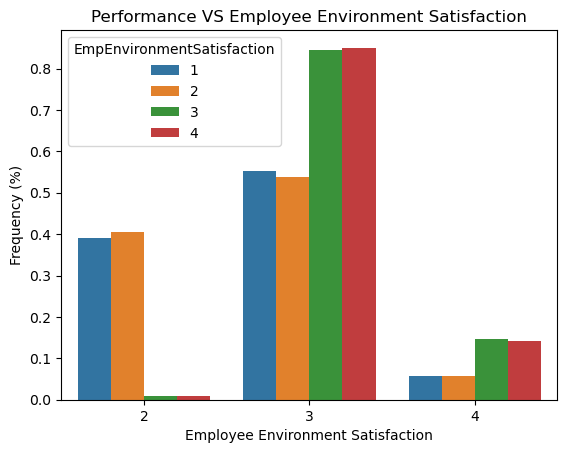

In [25]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EmpEnvironmentSatisfaction"].astype(str))
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="EmpEnvironmentSatisfaction",
    data=df_plot
)
plt.xlabel("Employee Environment Satisfaction")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Employee Environment Satisfaction");

### Employee Last Salary Hike Percent

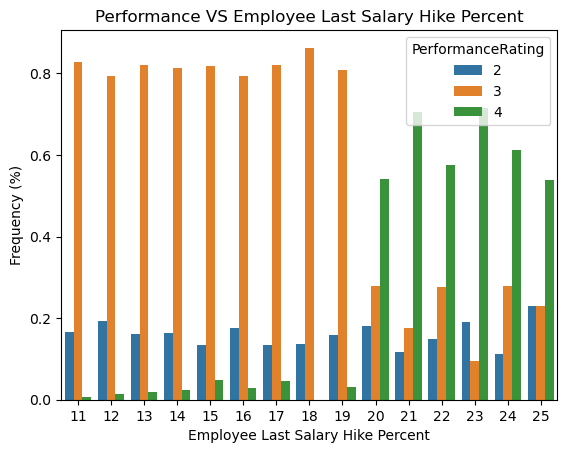

In [26]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EmpLastSalaryHikePercent"].astype(str))
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="EmpLastSalaryHikePercent",
    y="frequency",
    hue="PerformanceRating",
    data=df_plot
)
plt.xlabel("Employee Last Salary Hike Percent")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Employee Last Salary Hike Percent");

We can observe that the employees whose last salary hike is 20% or higher are more likely to be rated 4. In another hand, the employees whose last salary rate is 19% or lower are more likely to be rated 3. Now, from the last salary hike we create another feature which two values: 20% or more and Lower than 20%

In [27]:
dataset["EmpLastSalaryHikePercent_2"] = dataset["EmpLastSalaryHikePercent"].apply(lambda x: "Lower than 20%" if x<20  else "20% or more")

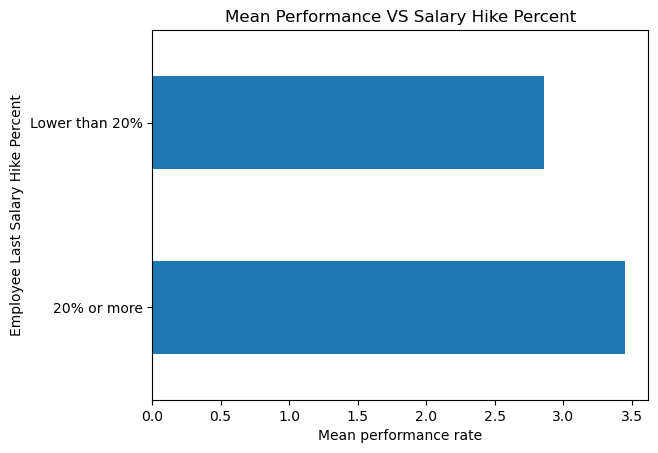

In [28]:
dataset["PerformanceRating"].groupby(dataset["EmpLastSalaryHikePercent_2"]).mean().plot(kind="barh")
plt.xlabel("Mean performance rate")
plt.ylabel("Employee Last Salary Hike Percent")
plt.title("Mean Performance VS Salary Hike Percent");

The mean performance rate seems to be higher for employees whose last salary hike was 20% or higher.

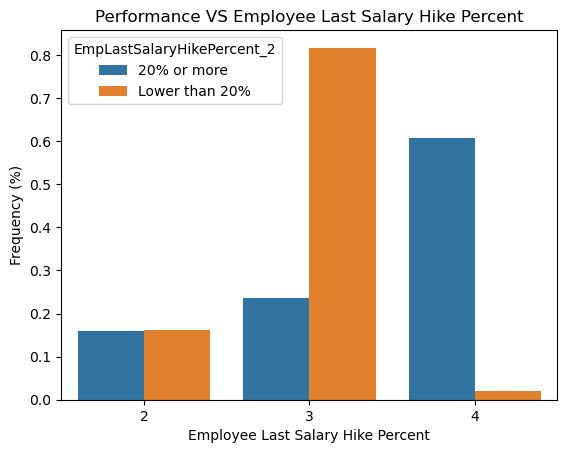

In [29]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EmpLastSalaryHikePercent_2"].astype(str))
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="PerformanceRating",
    y="frequency",
    hue="EmpLastSalaryHikePercent_2",
    data=df_plot
)
plt.xlabel("Employee Last Salary Hike Percent")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Employee Last Salary Hike Percent");

As seen before, the employees whose last salary hike is 20% or higher are more likely to be rated 4 and the employees whose last salary rate is 19% or lower are more likely to be rated 3.

### Employee Work Life Balance

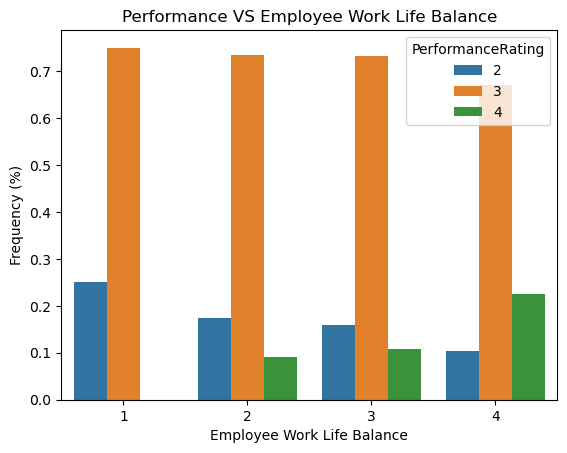

In [30]:
df_plot = (dataset["PerformanceRating"]
 .groupby(dataset["EmpWorkLifeBalance"].astype(str))
 .value_counts(normalize=True)
 .rename("frequency")
 .to_frame()
 .reset_index()
)
sns.barplot(
    x="EmpWorkLifeBalance",
    y="frequency",
    hue="PerformanceRating",
    data=df_plot
)
plt.xlabel("Employee Work Life Balance")
plt.ylabel("Frequency (%)")
plt.title("Performance VS Employee Work Life Balance");

The figure above shows a correlation between the employee work balance and the performance rating. We can see that higher is the performance rating and lower are the frequencies of employees who were rated 2 or 3, whereas higher is the employee life balance, higher is the fequency of employees rated 4.

## Feature selection for data modelling

Below, we are selecting features (numerical and categorical) correlated with the peformance. Only these featues They will be used  

In [31]:
features = ["EducationBackground","MaritalStatus", "EmpDepartment",
            "Attrition", "EmpLastSalaryHikePercent_2",
            "EmpEnvironmentSatisfaction", 
            "EmpWorkLifeBalance", "PerformanceRating"]

data = dataset[features]

In [32]:
data.head()

,EducationBackground,MaritalStatus,EmpDepartment,Attrition,EmpLastSalaryHikePercent_2,EmpEnvironmentSatisfaction,EmpWorkLifeBalance,PerformanceRating
EmpNumber,,,,,,,,
E1001000,Marketing,Single,Sales,No,Lower than 20%,4,2,3
E1001006,Marketing,Single,Sales,No,Lower than 20%,4,3,3
E1001007,Life Sciences,Married,Sales,No,20% or more,4,3,4
E1001009,Human Resources,Divorced,Human Resources,No,Lower than 20%,2,2,3
E1001010,Marketing,Single,Sales,No,Lower than 20%,1,3,3


In [33]:
from processClass import EncScaler

target = "PerformanceRating"
independants = data.drop(columns=target).columns
dataset2 = dataset[independants]
num_cols = [col for col in dataset2.columns if dataset2[col].dtype=='int']
cat_cols = [col for col in dataset2.columns if dataset2[col].dtype=='O']

X=pd.DataFrame()

for col in cat_cols:
    possible_categories = dataset2[col].unique()
    X[col] = pd.Categorical(dataset2[col], categories=possible_categories) #Defining the categorical 
                                    # featues in order to take in account all the possible categories

X = X.reset_index()[cat_cols]
X[num_cols] = pd.concat([X,dataset2[num_cols].reset_index()], axis=1)[num_cols]

cat_type = CategoricalDtype(categories=['1', '2', '3', '4', '5'], ordered=True)
y = dataset[target]#.astype(str).astype(cat_type)

In [34]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
lrc = make_pipeline(
        EncScaler(),
        LogisticRegression()
    )
lrc.fit(X_train,y_train)

Pipeline(steps=[('encscaler', EncScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
print(f"Model accuracy on the training set: {lrc.score(X_train,y_train)}")
print(f"Model accuracy on the test set: {lrc.score(X_test,y_test)}")

Model accuracy on the training set: 0.828125
Model accuracy on the test set: 0.8291666666666667


In [37]:
params_lrc = {"logisticregression__penalty":['l1', 'l2', 'elasticnet'],
              "logisticregression__C":range(25,100,25),
              "logisticregression__max_iter":range(0,100,25)
        
}
model_lrc = GridSearchCV(
            estimator=lrc,
            param_grid = params_lrc,
            cv=5,
            verbose=1,
            n_jobs=-1
)

In [38]:
model_lrc.fit(X_train, y_train)
model_lrc.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

{'logisticregression__C': 25,
 'logisticregression__max_iter': 50,
 'logisticregression__penalty': 'l2'}

In [39]:
print("Accuracy on training set: ", model_lrc.score(X_train, y_train))
print("Accuracy on test set: ", model_lrc.score(X_test, y_test))

Accuracy on training set:  0.8270833333333333
Accuracy on test set:  0.8333333333333334


In [40]:
#Random forest

In [41]:
rfc = make_pipeline(
        EncScaler(),
        RandomForestClassifier()
    )
rfc.fit(X_train,y_train)

Pipeline(steps=[('encscaler', EncScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [42]:
print(f"Training accuracy: {rfc.score(X_train,y_train)}")
print(f"Test accuracy: {rfc.score(X_test,y_test)}")

Training accuracy: 0.9375
Test accuracy: 0.7875


In [43]:
#
params_rfc = {"randomforestclassifier__n_estimators":range(10,100,10),
              "randomforestclassifier__max_depth":range(10,50,5)}
params_rfc

{'randomforestclassifier__n_estimators': range(10, 100, 10),
 'randomforestclassifier__max_depth': range(10, 50, 5)}

In [44]:
model_rfc = GridSearchCV(
            estimator=rfc,
            param_grid = params_rfc,
            cv=5,
            verbose=1,
            n_jobs=-1)
model_rfc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encscaler', EncScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 5),
                         'randomforestclassifier__n_estimators': range(10, 100, 10)},
             verbose=1)

In [45]:
model_rfc.fit(X_train,y_train)
model_rfc.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 20}

In [46]:
acc_train = model_rfc.score(X_train, y_train)
acc_test = model_rfc.score(X_test, y_test)
print("Train accuracy: ", round(acc_train,3))
print("Test accuracy: ", round(acc_test,3))

Train accuracy:  0.922
Test accuracy:  0.767


In [47]:
#Gradient descent

In [48]:
gdc = make_pipeline(
        EncScaler(),
        GradientBoostingClassifier()
    )
gdc.fit(X_train,y_train)

Pipeline(steps=[('encscaler', EncScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [49]:
print(f"Model accuracy on the training set: {gdc.score(X_train,y_train)}")
print(f"Model accuracy on the test set: {gdc.score(X_test,y_test)}")

Model accuracy on the training set: 0.88125
Model accuracy on the test set: 0.8


In [50]:
params_gdc = {"gradientboostingclassifier__n_estimators":range(40,50,1),
              "gradientboostingclassifier__max_depth":range(1,10,1)}

model_gdc = GridSearchCV(
                estimator=gdc,
                param_grid = params_gdc,
                cv=5,
                verbose=1,
                n_jobs=-1
)

In [51]:
model_gdc.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encscaler', EncScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(1, 10),
                         'gradientboostingclassifier__n_estimators': range(40, 50)},
             verbose=1)

In [52]:
model_gdc.best_params_

{'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 40}

In [53]:
acc_train = model_gdc.score(X_train, y_train)
acc_test = model_gdc.score(X_test, y_test)
print("Train accuracy: ", round(acc_train,3))
print("Test accuracy: ", round(acc_test,3))

Train accuracy:  0.869
Test accuracy:  0.779


In [54]:
#Support vector classifier

In [55]:
svc = make_pipeline(
        EncScaler(),
        SVC()
    )
svc.fit(X_train,y_train)

Pipeline(steps=[('encscaler', EncScaler()), ('svc', SVC())])

In [56]:
print("Training accuracy: ", svc.score(X_train, y_train))
print("Test accuracy: ", svc.score(X_test, y_test))

Training accuracy:  0.86875
Test accuracy:  0.7791666666666667


In [57]:
params_svc = {"svc__C":range(85,95,1),
             "svc__kernel":["rbf"],#["linear","poly","rbf","sigmoid","precomputed","callable"],
             "svc__gamma":["auto"]}#["scale","auto","float"]}
model_svc = GridSearchCV(
            estimator=svc,
            param_grid = params_svc,
            cv=5,
            verbose=1,
            n_jobs=-1
)

In [58]:
model_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encscaler', EncScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': range(85, 95), 'svc__gamma': ['auto'],
                         'svc__kernel': ['rbf']},
             verbose=1)

In [59]:
model_svc.best_params_

{'svc__C': 85, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}

In [60]:
print("Training accuracy: ", model_svc.score(X_train, y_train))
print("Test accuracy: ", model_svc.score(X_test, y_test))

Training accuracy:  0.903125
Test accuracy:  0.7791666666666667


In [61]:
# Comparison of best models
metrics = ["Accuracy", "Recall", "Precision", "F1"]

In [62]:
#Logistic regression
C = model_lrc.best_params_["logisticregression__C"]
max_iter = model_lrc.best_params_["logisticregression__max_iter"]
penalty = model_lrc.best_params_["logisticregression__penalty"]

lrc_2 = make_pipeline(
        EncScaler(),
        LogisticRegression(C = C,
                           max_iter=max_iter,
                           penalty=penalty)
)
lrc_2.fit(X_train,y_train)

pred_lrc = lrc_2.predict(X_test)

f1 = 2*recall_score(y_test,pred_lrc, average="weighted")*precision_score(y_test,pred_lrc, average="weighted")/(recall_score(y_test,pred_lrc, average="weighted")+precision_score(y_test,pred_lrc, average="weighted"))
log_reg = [accuracy_score(y_test,pred_lrc),
           recall_score(y_test,pred_lrc, average="weighted"),
           precision_score(y_test,pred_lrc, average="weighted"),
           f1]

#Random forest
max_depth = model_rfc.best_params_["randomforestclassifier__max_depth"]
n_estimators = model_rfc.best_params_["randomforestclassifier__n_estimators"]

rfc_2 = make_pipeline(
        EncScaler(),
        RandomForestClassifier(n_estimators = n_estimators,
                           max_depth=max_depth)
)
rfc_2.fit(X_train,y_train)

pred_rfc = rfc_2.predict(X_test)

f1 = 2*recall_score(y_test,pred_rfc, average="weighted")*precision_score(y_test,pred_rfc, average="weighted")/(recall_score(y_test,pred_rfc, average="weighted")+precision_score(y_test,pred_rfc, average="weighted"))

rand_for = [accuracy_score(y_test,pred_rfc),
           recall_score(y_test,pred_rfc, average="weighted"),
           precision_score(y_test,pred_rfc, average="weighted"),
           f1]

#Gradient Boosting
max_depth = model_gdc.best_params_["gradientboostingclassifier__max_depth"]
n_estimators = model_gdc.best_params_["gradientboostingclassifier__n_estimators"]

gdc_2 = make_pipeline(
        EncScaler(),
        GradientBoostingClassifier(n_estimators = n_estimators,
                           max_depth=max_depth)
)
gdc_2.fit(X_train,y_train)

pred_gdc = gdc_2.predict(X_test)

f1 = 2*recall_score(y_test,pred_gdc, average="weighted")*precision_score(y_test,pred_gdc, average="weighted")/(recall_score(y_test,pred_gdc, average="weighted")+precision_score(y_test,pred_gdc, average="weighted"))

grad_boost = [accuracy_score(y_test,pred_gdc),
           recall_score(y_test,pred_gdc, average="weighted"),
           precision_score(y_test,pred_gdc, average="weighted"),
           f1]

#Support vector machine

C = model_svc.best_params_["svc__C"]
gamma = model_svc.best_params_["svc__gamma"]
kernel = model_svc.best_params_["svc__kernel"]

svc_2 = make_pipeline(
        EncScaler(),
        SVC(C=C,
                           gamma=gamma,
                           kernel=kernel)
)
svc_2.fit(X_train,y_train)

pred_svc = svc_2.predict(X_test)

f1 = 2*recall_score(y_test,pred_svc, average="weighted")*precision_score(y_test,pred_svc, average="weighted")/(recall_score(y_test,pred_svc, average="weighted")+precision_score(y_test,pred_svc, average="weighted"))
sup_vec = [accuracy_score(y_test,pred_svc),
           recall_score(y_test,pred_svc, average="weighted"),
           precision_score(y_test,pred_svc, average="weighted"),
           f1]

#Ordinal logistic regression
X_trainT = EncScaler().fit_transform(X_train)
orderedModel = OrderedModel(y_train.reset_index(drop=True), X_trainT.reset_index(drop=True), distr='logit')
res_log = orderedModel.fit(method='bfgs')
y_train_pred = res_log.model.predict(res_log.params, exog=X_trainT)

X_testT = EncScaler().fit_transform(X_test)
y_test_pred = res_log.model.predict(res_log.params, exog=X_testT)
y_test_pred = [list(elt).index(1)+2 for elt in np.round(y_test_pred)]

f1 = 2*recall_score(y_test,y_test_pred, average="weighted")*precision_score(y_test,y_test_pred, average="weighted")/(recall_score(y_test,y_test_pred, average="weighted")+precision_score(y_test,y_test_pred, average="weighted"))
ord_log_reg = [accuracy_score(y_test,y_test_pred),
           recall_score(y_test,y_test_pred, average="weighted"),
           precision_score(y_test,y_test_pred, average="weighted"),
           f1]

/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.508522
         Iterations: 116
         Function evaluations: 117
         Gradient evaluations: 117


/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]
/Users/adrienkouanda/anaconda3/lib/python3.10/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [63]:
performances = pd.DataFrame({"LogisticR":log_reg,
                             "RandomF":rand_for,
                             "GrandientB":grad_boost,
                             "SupportV":sup_vec,
                             "Ord Reg Log":ord_log_reg},
                           index=metrics)
performances

,LogisticR,RandomF,GrandientB,SupportV,Ord Reg Log
Accuracy,0.833333,0.779167,0.779167,0.779167,0.816667
Recall,0.833333,0.779167,0.779167,0.779167,0.816667
Precision,0.836791,0.801441,0.840130,0.832163,0.810085
F1,0.835059,0.790147,0.808501,0.804793,0.813363


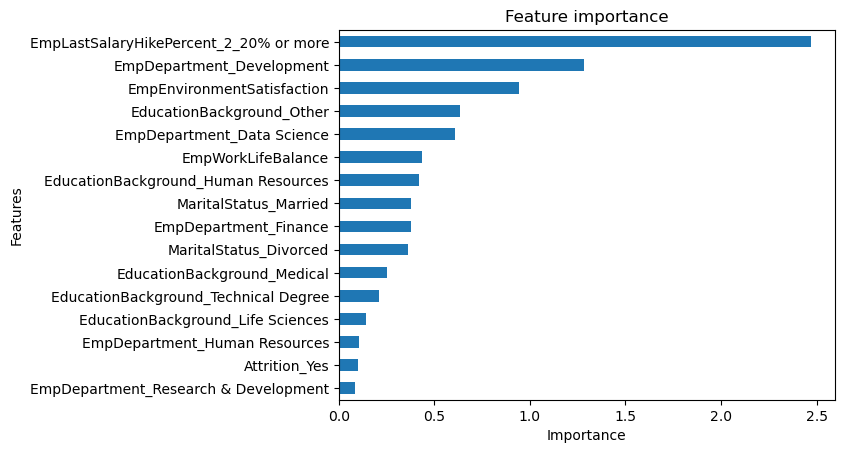

In [64]:
#Feature importance: logistic regression

names = lrc_2.named_steps["logisticregression"].feature_names_in_


coef = np.abs(lrc_2.named_steps["logisticregression"].coef_)
importances = pd.Series((coef[0]+coef[1]+coef[2])/3, index=names).sort_values().tail(20)
importances.plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importance")
plt.savefig("feature_importances.png")
plt.show();


In [65]:
importances

EmpDepartment_Research & Development      0.083230
Attrition_Yes                             0.102931
EmpDepartment_Human Resources             0.103359
EducationBackground_Life Sciences         0.143311
EducationBackground_Technical Degree      0.211678
EducationBackground_Medical               0.251595
MaritalStatus_Divorced                    0.361139
EmpDepartment_Finance                     0.378491
MaritalStatus_Married                     0.379938
EducationBackground_Human Resources       0.417849
EmpWorkLifeBalance                        0.436699
EmpDepartment_Data Science                0.608518
EducationBackground_Other                 0.633054
EmpEnvironmentSatisfaction                0.941525
EmpDepartment_Development                 1.282745
EmpLastSalaryHikePercent_2_20% or more    2.471668
dtype: float64

In [66]:
with open("logisticR.p", "wb") as f:
    pickle.dump(lrc_2, f)